<center>
    
    COMP4240/5435 - Reinforcement Learning
    
# Final Project

    
</center>


Student Name: _____Harshal Dafade (02125321)_____

### **Task Properties**

The **CartPole-v1** environment is a classic reinforcement learning task provided by the Gymnasium library. The objective is to balance a pole on a moving cart by applying forces to the cart's left or right sides. This requires the agent to develop a policy that effectively controls the cart's movements to keep the pole upright for as long as possible.

**Environment Details:**

- **Goal:**  
  - **Balance Maintenance:** Keep the pole balanced upright for as long as possible by controlling the cart's movements.

- **State Space:**  
  - The state is represented by a 4-dimensional continuous vector:
    1. **Cart Position ($x$):** $$[-4.8, 4.8]$$  
    2. **Cart Velocity ($\dot{x}$):** $$[-3.0, 3.0]$$  
    3. **Pole Angle ($\theta$):** $$[-0.418, 0.418]$$ radians  
    4. **Pole Angular Velocity ($\dot{\theta}$):** $$[-3.5, 3.5]$$ radians/sec  
  - These bounds are based on the environment's termination conditions and are used to normalize the state observations.
  - Cart Velocity and Pole Angular Velocities have been bounded for practical use, in the evironment they range from -inf to inf.

- **Action Space:**  
  - Discrete with two possible actions:
    1. **Push Left (0):** Apply a force to the left on the cart.
    2. **Push Right (1):** Apply a force to the right on the cart.

- **Reward Structure:**  
  - The agent receives a reward of $$+1$$ for every time step the pole remains balanced.
  - The episode terminates if:
    - The pole angle exceeds $$\pm12^\circ$$ ($$\pm0.209$$ radians).
    - The cart position exceeds $$\pm2.4$$ units from the center.
    - The episode reaches 500 time steps.

**Key Challenges:**

- **Balancing Precision:**  
  The agent must make timely and accurate movements to counteract the pole's tilt, requiring effective policy learning.

- **Continuous State Handling:**  
  Managing the continuous state variables necessitates robust function approximation techniques to generalize learning across the state space.


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from actor_critic import ActorCritic, plot_rewards, plot_steps, animate_policy


Run 1/50
Episode 10/500, Total Reward: 11.0, Steps: 11
Episode 20/500, Total Reward: 22.0, Steps: 22
Episode 30/500, Total Reward: 40.0, Steps: 40
Episode 40/500, Total Reward: 34.0, Steps: 34
Episode 50/500, Total Reward: 20.0, Steps: 20
Episode 60/500, Total Reward: 22.0, Steps: 22
Episode 70/500, Total Reward: 95.0, Steps: 95
Episode 80/500, Total Reward: 18.0, Steps: 18
Episode 90/500, Total Reward: 17.0, Steps: 17
Episode 100/500, Total Reward: 16.0, Steps: 16
Episode 110/500, Total Reward: 25.0, Steps: 25
Episode 120/500, Total Reward: 28.0, Steps: 28
Episode 130/500, Total Reward: 14.0, Steps: 14
Episode 140/500, Total Reward: 24.0, Steps: 24
Episode 150/500, Total Reward: 20.0, Steps: 20
Episode 160/500, Total Reward: 40.0, Steps: 40
Episode 170/500, Total Reward: 22.0, Steps: 22
Episode 180/500, Total Reward: 80.0, Steps: 80
Episode 190/500, Total Reward: 115.0, Steps: 115
Episode 200/500, Total Reward: 500.0, Steps: 500
Episode 210/500, Total Reward: 500.0, Steps: 500
Episode

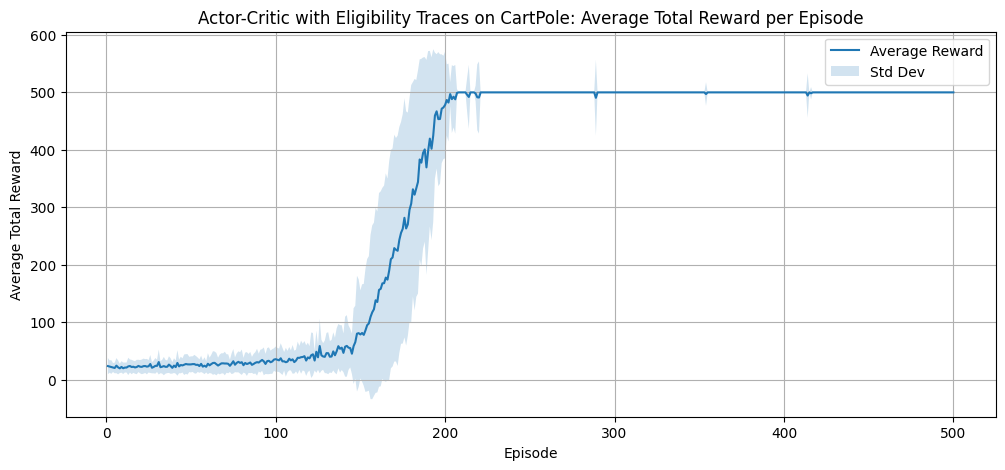

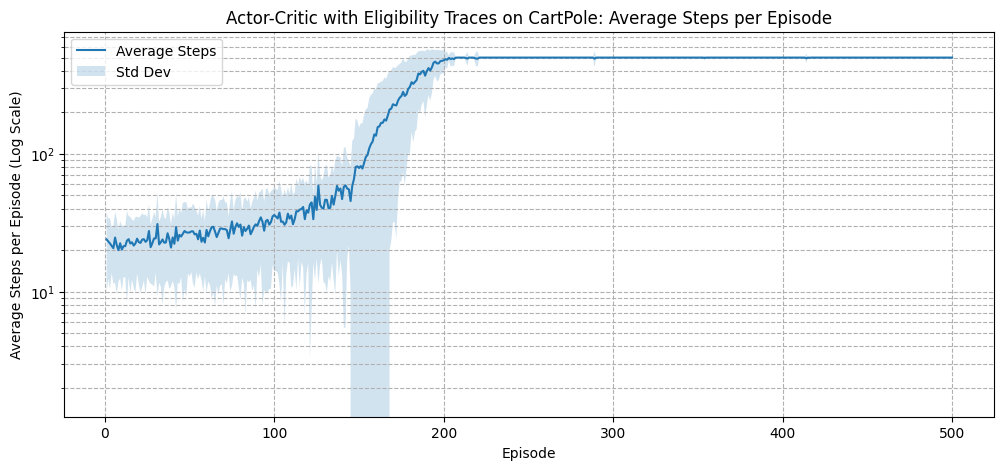

Optimal Values over 50 runs:
Maximum Average Reward: 500.0
Minimum Average Steps per Episode: 19.98


In [54]:

import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from actor_critic import ActorCritic, plot_rewards, plot_steps, animate_policy

num_runs = 50
num_episodes = 500
alpha_w = 0.0001
alpha_theta = 0.000001
gamma = 1.0
lambd = 0.9
order = 4

all_total_rewards = []
all_steps_per_episode = []

for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")
    env = gym.make('CartPole-v1', max_episode_steps=500)
    agent = ActorCritic(env, alpha_w, alpha_theta, gamma, lambd, order)
    total_rewards, steps_per_episode = agent.train(num_episodes)
    all_total_rewards.append(total_rewards)
    all_steps_per_episode.append(steps_per_episode)
    env.close()
    print(f"Completed Run {run + 1}/{num_runs}\n")

all_total_rewards = np.array(all_total_rewards)
all_steps_per_episode = np.array(all_steps_per_episode)

avg_total_rewards = np.mean(all_total_rewards, axis=0)
std_total_rewards = np.std(all_total_rewards, axis=0)
avg_steps_per_episode = np.mean(all_steps_per_episode, axis=0)
std_steps_per_episode = np.std(all_steps_per_episode, axis=0)

plot_rewards(avg_total_rewards, std_total_rewards, num_episodes)
plot_steps(avg_steps_per_episode, std_steps_per_episode, num_episodes)

max_reward = np.max(avg_total_rewards)
min_steps = np.min(avg_steps_per_episode)
print(f"Optimal Values over {num_runs} runs:")
print(f"Maximum Average Reward: {max_reward}")
print(f"Minimum Average Steps per Episode: {min_steps}")


In [55]:
print("Animating the final policy...")
env = gym.make('CartPole-v1', render_mode='human', max_episode_steps=500)
animate_policy(env, agent)
env.close()


Animating the final policy...
Animation complete. Total Reward: 500.0, Steps: 500


### **Parameter Selection**

The selection of hyperparameters for the **Actor-Critic with Eligibility Traces** algorithm in the **CartPole-v1** environment was meticulously chosen to balance learning efficiency and stability. We conducted **50 runs** to ensure statistical reliability, with each run comprising **500 episodes** to provide sufficient training iterations for the agent to explore and refine its policy. The **critic step-size ($\alpha_w$)** was set to **0.0001** to enable gradual and stable updates to the value function, preventing large oscillations during learning. The **actor step-size ($\alpha_\theta$)** was chosen as **0.000001** to allow for precise and incremental policy updates, ensuring that policy changes are subtle and do not destabilize the learning process. A **discount factor ($\gamma$)** of **1.0** was employed to emphasize the importance of future rewards equally with immediate rewards, aligning with the objective of maintaining long-term balance. The **eligibility trace decay ($\lambda$)** parameter was set to **0.9** to facilitate significant credit assignment over multiple time steps, allowing actions taken several steps prior to influence learning effectively. Lastly, the **Fourier basis order ($order$)** was set to **4** to provide a balanced feature representation that captures the state space's complexities without incurring excessive computational overhead. These hyperparameter choices collectively aim to ensure that the agent can learn an effective and stable policy for balancing the pole.
